# UFC Exploratory Visual Analysis Part 1

## List of Contents:
## 01. Importing Libraries
## 02. Importing Data
## 03. Removing Variables
## 04. Correlation Matrix Heatmap
## 05. Scatterplots of Strong Correlation Variables
## 06. Pair Plot
## 07. Categorical Plot
## 08. Revisiting Questions
## 09. Hypothesis
## 10. Exporting Data

## --

## 01. Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
#Checking version of matplotlib
matplotlib.__version__

'3.7.2'

In [3]:
#Option to display charts without call
%matplotlib inline

## 02. Importing Data

In [4]:
#Defining path for data import
path = r'C:\Users\Mosspants\Desktop\CareerFoundry\A6_Advanced Analytics & Dashboard Design\UFC_Project'

In [5]:
#Importing data
df_ufc = pd.read_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'ufc_cleaned.csv'), index_col=False)

In [6]:
#Checking import
df_ufc.head()

Unnamed: 0      R_fighter          B_fighter        Referee  \
0           0   Adrian Yanez      Gustavo Lopez  Chris Tognoni   
1           1   Trevin Giles      Roman Dolidze      Herb Dean   
2           2    Tai Tuivasa    Harry Hunsucker      Herb Dean   
3           3  Cheyanne Buys  Montserrat Conejo     Mark Smith   
4           4  Marion Reneau      Macy Chiasson     Mark Smith   

                 location Winner  title_bout       weight_class  \
0  Las Vegas, Nevada, USA    Red       False       Bantamweight   
1  Las Vegas, Nevada, USA    Red       False       Middleweight   
2  Las Vegas, Nevada, USA    Red       False        Heavyweight   
3  Las Vegas, Nevada, USA   Blue       False   WomenStrawweight   
4  Las Vegas, Nevada, USA   Blue       False  WomenBantamweight   

   B_total_time_fought(seconds)  B_total_rounds_fought  ...  \
0                      531.5000                      4  ...   
1                      577.5000                      4  ...   
2                      643.9375                      0  ...   
3                      643.9375                      0  ...   
4                      764.0000                     11  ...   

   R_win_by_TKO_Doctor_Stoppage  R_Stance  R_Height_cms  R_Reach_cms  \
0                             0  Orthodox        170.18       177.80   
1                             0  Orthodox        182.88       187.96   
2                             0  Southpaw        187.96       190.50   
3                             0    Switch        160.02       160.02   
4                             0  Orthodox        167.64       172.72   

   R_Weight_lbs  B_age  R_age  Day  Month  Year  
0         135.0   31.0   27.0   20      3  2021  
1         185.0   32.0   28.0   20      3  2021  
2         264.0   32.0   28.0   20      3  2021  
3         115.0   28.0   25.0   20      3  2021  
4         135.0   29.0   43.0   20      3  2021  

[5 rows x 51 columns]

## 03. Removing Variables

### Each row is a single fight, not a total of wins or stats. This means that some columns might have double or tripple the same information if a fighter is fighting more than once. To get an idea of what this looks like I will run a count on some columns.

In [7]:
#Count of R_fighter
df_ufc['R_fighter'].value_counts(dropna=False)

R_fighter
Jim Miller            27
Demian Maia           24
Donald Cerrone        24
Andrei Arlovski       24
Diego Sanchez         24
                      ..
Dustin Kimura          1
Royston Wee            1
Isaac Vallie-Flagg     1
Ramiro Hernandez       1
Lance Gibson           1
Name: count, Length: 1452, dtype: int64

In [8]:
#Count of R_fighter
df_ufc['B_fighter'].value_counts(dropna=False)

B_fighter
Jeremy Stephens     21
Charles Oliveira    19
Nik Lentz           15
Rafael Dos Anjos    14
Sam Alvey           13
                    ..
Rogerio Bontorin     1
Mike Lullo           1
Mike Stumpf          1
Alen Amedovski       1
Jermaine Andre       1
Name: count, Length: 1864, dtype: int64

### It does not seem like fighters are in very many matches, if the max number for each side is in the twenties. The Red fighters with the most count are also not the same people as the Blue fighters with the most count.

In [25]:
#Breaking down fights by year to see how many there should be in a full year. Data we have ends in March 2021.
df_2000 = df_ufc[df_ufc['Year'] == 2000]

In [26]:
df_2000.shape

(43, 51)

In [27]:
df_2001 = df_ufc[df_ufc['Year'] == 2001]

In [28]:
df_2001.shape

(40, 51)

In [29]:
df_2002 = df_ufc[df_ufc['Year'] == 2002]

In [30]:
df_2002.shape

(53, 51)

In [31]:
df_2010 = df_ufc[df_ufc['Year'] == 2010]

In [32]:
df_2010.shape

(253, 51)

In [33]:
df_2015 = df_ufc[df_ufc['Year'] == 2015]

In [34]:
df_2015.shape

(473, 51)

In [35]:
df_2020 = df_ufc[df_ufc['Year'] == 2020]

In [36]:
df_2020.shape

(456, 51)

In [37]:
df_2021 = df_ufc[df_ufc['Year'] == 2021]

In [38]:
df_2021.shape

(116, 51)

### The number of fights vary per year. This may be something that will influence the data, but for now we can continue to look at how the variables interact. Based on the questions developed in the previous exercise, I will run numerical visual analysis on:
### B_total_time_fought(seconds), B_total_rounds_fought, B_total_title_bouts, B_current_win_streak, B_longest_win_streak, B_wins, B_losses, B_Height_cms, B_Reach_cms, B_Weight_lbs, R_total_time_fought(seconds),  R_total_rounds_fought, R_total_title_bouts, R_current_win_streak, R_longest_win_streak, R_wins, R_losses, R_Height_cms, R_Reach_cms, R_Weight_lbs, B_age, and R_age.
### Draws are notated in the 'Winner' column, but these are strings. For now we can look at wins and losses. The individual draw columns for each side are blank.

In [45]:
#Creating subset of varibles to analyze
df_sub = df_ufc[['B_total_time_fought(seconds)', 'B_total_rounds_fought', 'B_total_title_bouts', 'B_current_win_streak', 'B_longest_win_streak', 'B_wins', 'B_losses', 'B_Height_cms', 'B_Reach_cms', 'B_Weight_lbs', 'R_total_time_fought(seconds)', 'R_total_rounds_fought', 'R_total_title_bouts', 'R_current_win_streak', 'R_longest_win_streak', 'R_wins', 'R_losses', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'B_age', 'R_age']]

## 04. Correlation Matrix Heatmap

In [46]:
#Creating correlation matrix of subset
df_sub.corr()

B_total_time_fought(seconds)  \
B_total_time_fought(seconds)                      1.000000   
B_total_rounds_fought                             0.185090   
B_total_title_bouts                               0.110919   
B_current_win_streak                              0.042428   
B_longest_win_streak                              0.067916   
B_wins                                            0.063829   
B_losses                                          0.028039   
B_Height_cms                                     -0.181405   
B_Reach_cms                                      -0.171807   
B_Weight_lbs                                     -0.183929   
R_total_time_fought(seconds)                      0.078961   
R_total_rounds_fought                             0.042927   
R_total_title_bouts                               0.042000   
R_current_win_streak                              0.017439   
R_longest_win_streak                              0.039859   
R_wins                                            0.032027   
R_losses                                          0.004374   
R_Height_cms                                     -0.156098   
R_Reach_cms                                      -0.143533   
R_Weight_lbs                                     -0.173010   
B_age                                             0.008333   
R_age                                             0.008675   

                              B_total_rounds_fought  B_total_title_bouts  \
B_total_time_fought(seconds)               0.185090             0.110919   
B_total_rounds_fought                      1.000000             0.473111   
B_total_title_bouts                        0.473111             1.000000   
B_current_win_streak                       0.428829             0.414209   
B_longest_win_streak                       0.761801             0.481172   
B_wins                                     0.937614             0.479450   
B_losses                                   0.861725             0.289881   
B_Height_cms                               0.039670             0.053902   
B_Reach_cms                                0.057271             0.057552   
B_Weight_lbs                               0.029408             0.085931   
R_total_time_fought(seconds)               0.111950             0.048966   
R_total_rounds_fought                      0.421009             0.138587   
R_total_title_bouts                        0.265487             0.192140   
R_current_win_streak                       0.272797             0.165814   
R_longest_win_streak                       0.441421             0.203074   
R_wins                                     0.454187             0.186042   
R_losses                                   0.270913             0.035504   
R_Height_cms                               0.037551             0.067364   
R_Reach_cms                                0.053679             0.072656   
R_Weight_lbs                               0.033551             0.100444   
B_age                                      0.394143             0.259996   
R_age                                      0.222436             0.084046   

                              B_current_win_streak  B_longest_win_streak  \
B_total_time_fought(seconds)              0.042428              0.067916   
B_total_rounds_fought                     0.428829              0.761801   
B_total_title_bouts                       0.414209              0.481172   
B_current_win_streak                      1.000000              0.693439   
B_longest_win_streak                      0.693439              1.000000   
B_wins                                    0.552952              0.869662   
B_losses                                  0.148625              0.483525   
B_Height_cms                              0.104722              0.112341   
B_Reach_cms                               0.117063              0.131984   
B_Weight_lbs                              0.088713              0.099999   
R_total_time_fough

In [47]:
#Assigning matrix
matrix = df_sub.corr()

In [48]:
#Exporting matrix to clipboard to save
matrix.to_clipboard()

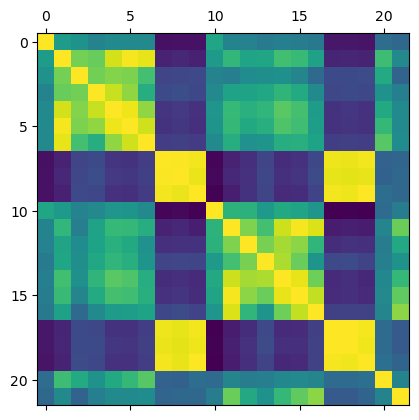

In [57]:
#Creating heatmap of matrix in matplotlib
plt.matshow(matrix.corr())

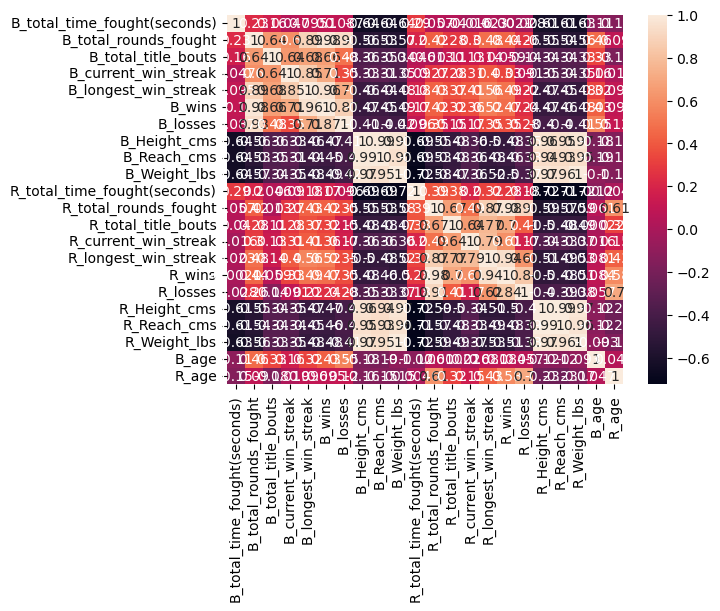

In [62]:
#Creating heatmap of matrix in seaborn
heatmap = sns.heatmap(matrix.corr(), annot = True)

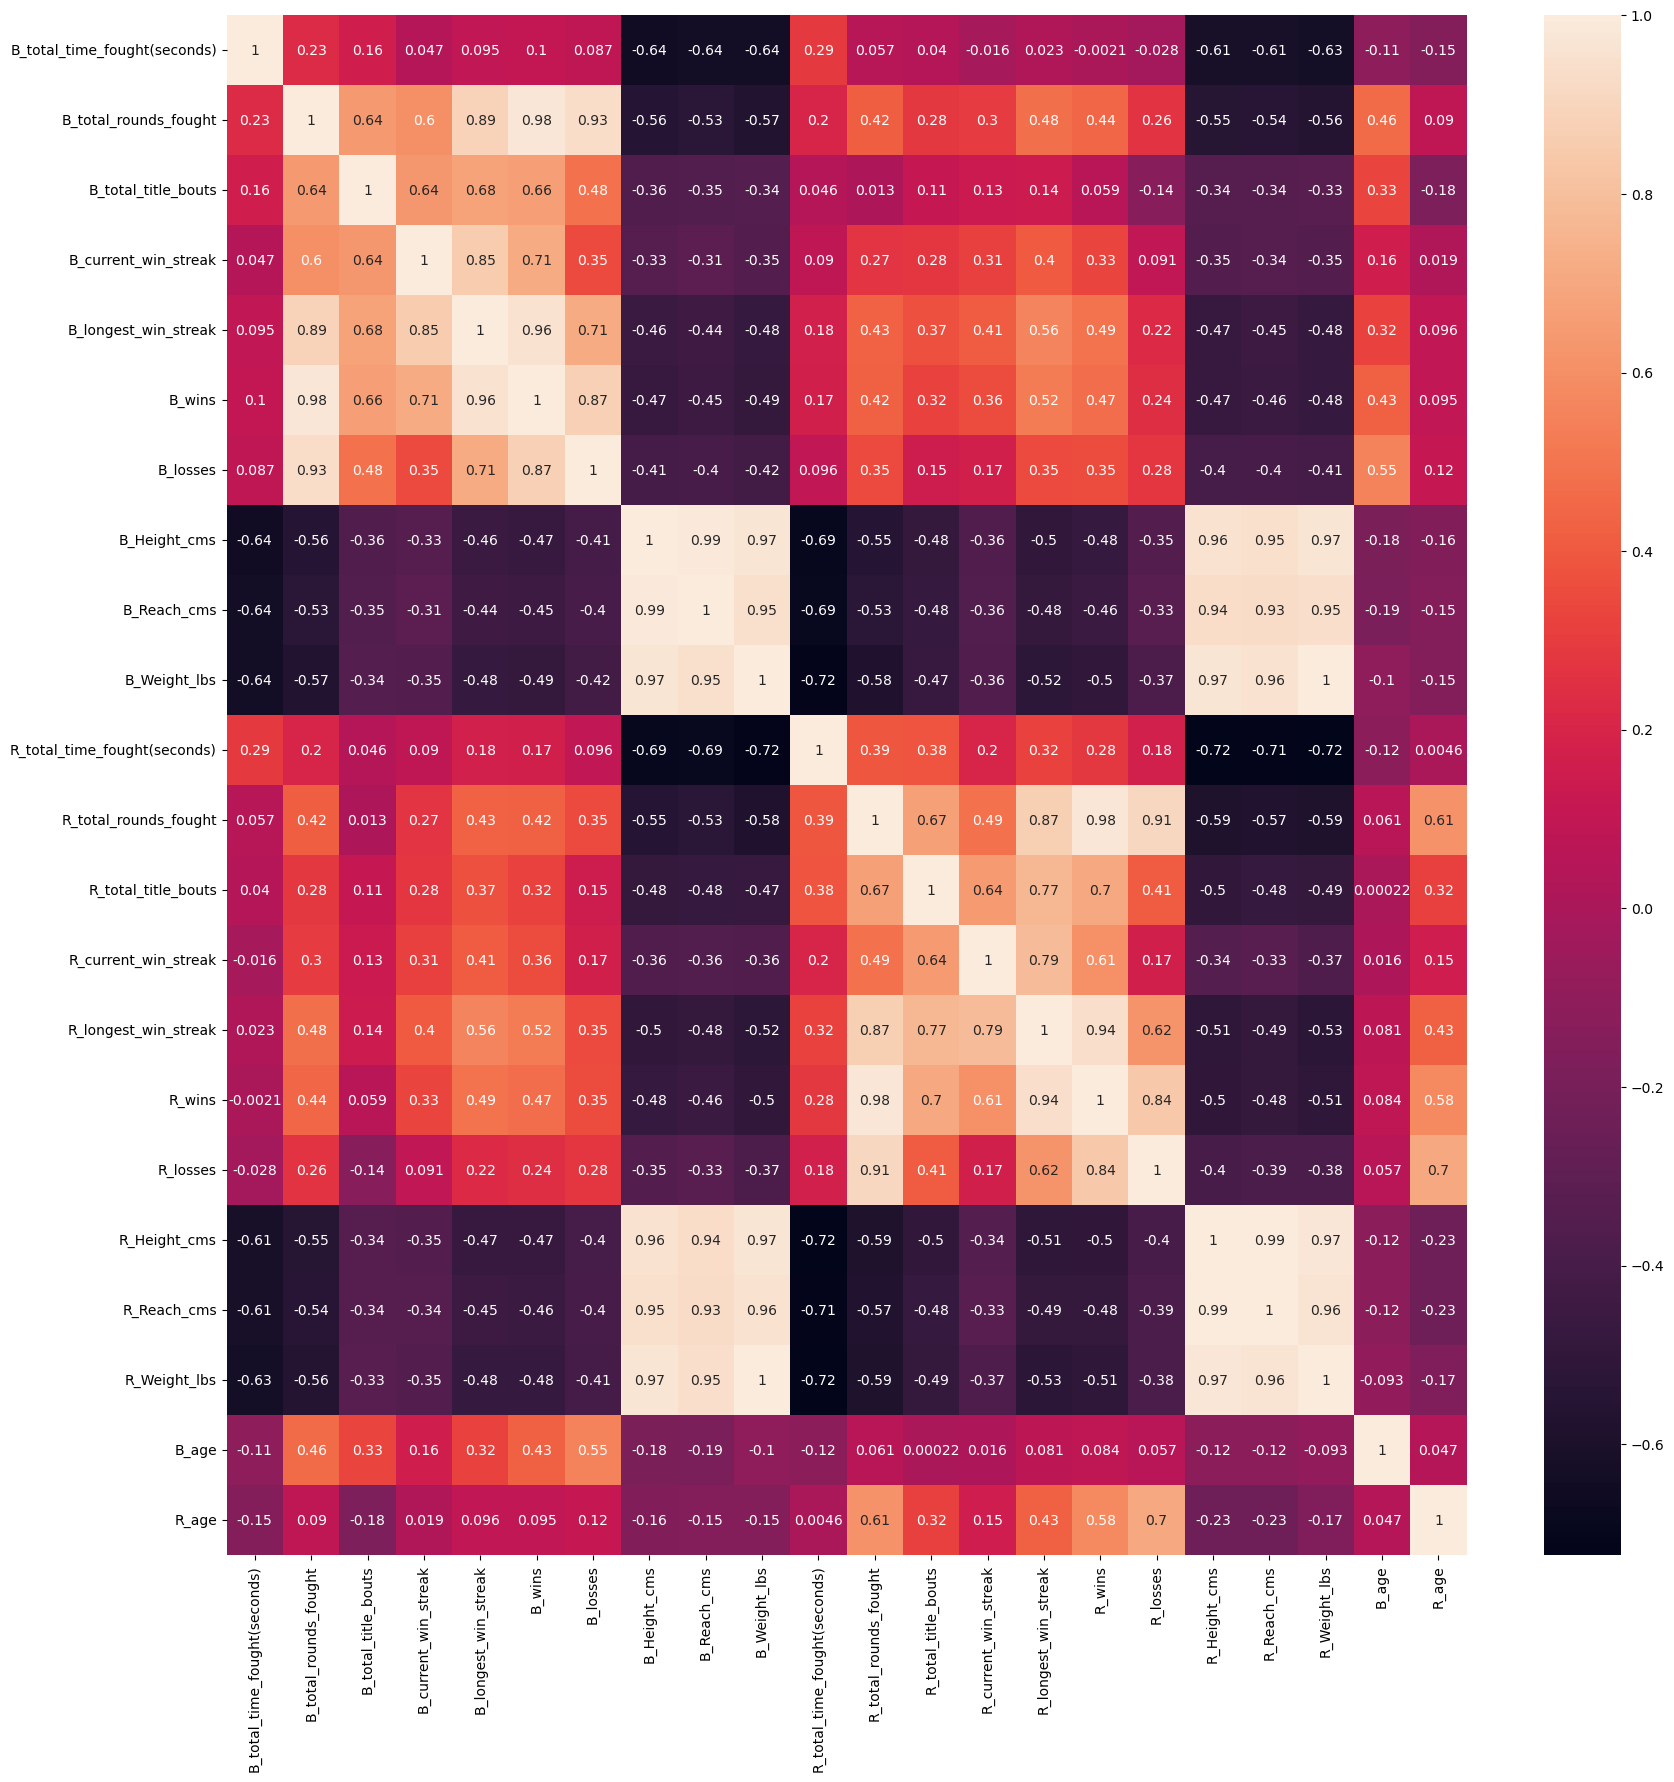

In [74]:
#Creating subplot in matplotlib, increasing size of map
fig, ax = plt.subplots(figsize=(20,20))
#Generating heatmap with coefficients in boxes
heatmap = sns.heatmap(matrix.corr(), annot = True)

In [75]:
#Saving heatmap
ufc_heatmap = heatmap.get_figure()

ufc_heatmap.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'heatmap.png'), dpi = 300, bbox_inches='tight')

### There are strong correlations between wins, losses, winning streak, and number of rounds fought. This makes sense as the more rounds you have, the more chances you have to win, lose, or be on a streak. You have another chance to knockout the opponent or control the fight to win via judge decision. It is also correlated with title bouts, which also makes sense. If you win more matches, you have a higher chance of fighting in the title match.

### There is also a strong correlation between B_wins and B_losses. The same can be said for R_wins and R_losses. This makes sense because a B fighter (Blue corner) will fight an R fighter (Red corner). If one wins the other will lose, because draws aren't part of this heatmap.

### There are also strong correlations between the height, reach, and weight of B and R. I think this is because of the way the data is arranged. Since it is by individual fights, a fighter can be on B corner and have their metrics recorded, then be on R corner and have their same metrics recorded. Both corners are sharing the same numbers.

### The height, weight, and reach do not seem to have a relationship with wins or losses, but may have a negative relationship with time fought. As height, weight, and reach increase, time fought decreases or vice versa. That may be true in the sense that fighters of different weight classes might have different fight times, but I don't think it is true for individual matches.

### One of the questions I had was about how age affected wins. R_age has a 0.7 coefficient with R_losses. It could mean that as age increases, losses increase. B_age and B_losses have a smaller coefficient of 0.55. 

## 05. Scatterplots of Strong Correlation Variables

### I will be making scatterplots of total rounds fought (both Blue and Red) compared to their respective wins, losses, and longest win streaks.
### We will also look at B weight, height, and reach against R weight, height, and reach.

## Blue Total Rounds, Wins, Losses, and Winning Streaks:

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


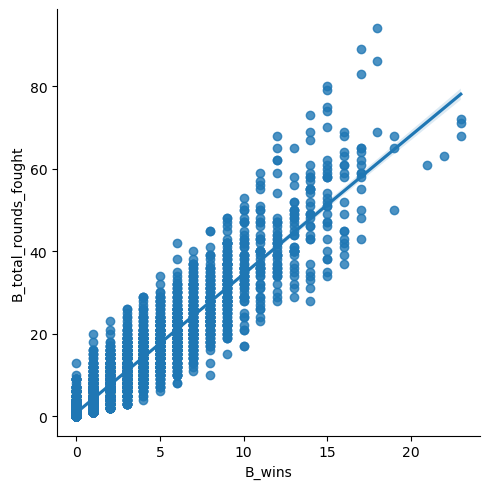

In [91]:
#Scatterplot of B_total_rounds_fought and B_wins
b_winscatter = sns.lmplot(y = 'B_total_rounds_fought', x = 'B_wins', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_win_rounds.png'), dpi = 300, bbox_inches='tight')

### These points do seem to trend upward, but do not seem to cluster close to the trend line. The points seem to stack up more vertically by number of wins. Some fighters can hit their 10th win after going 40 rounds, while some do it in 20 or less. More rounds might mean more wins, but I think only because there are more chances to win. Most fights are a max of 3 rounds long, while title matches are a max of 5 rounds.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


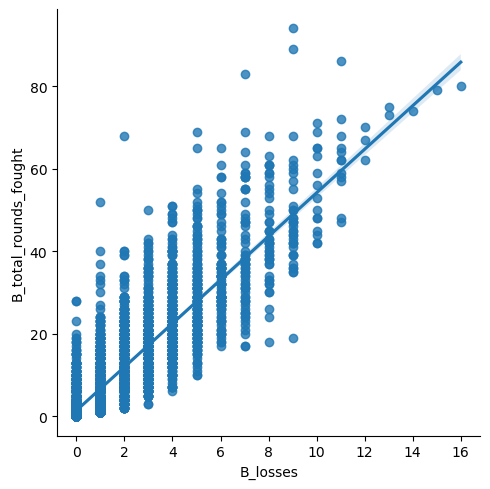

In [92]:
#Scatterplot of B_total_rounds_fought and B_losses
b_lossescatter = sns.lmplot(y = 'B_total_rounds_fought', x = 'B_losses', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_losses_rounds.png'), dpi = 300, bbox_inches='tight')

### We can see the same upward trend with losses, and the same stacked graph. More rounds also means more losses because there are more chances to loose.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


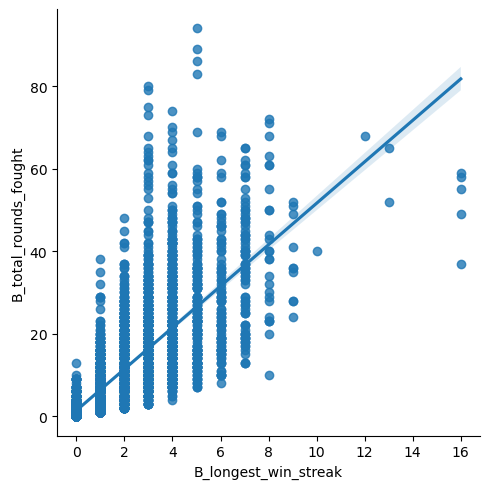

In [93]:
#Scatterplot of B_total_rounds_fought and B_longest_win_streak
b_streakcatter = sns.lmplot(y = 'B_total_rounds_fought', x = 'B_longest_win_streak', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_streak_rounds.png'), dpi = 300, bbox_inches='tight')

### Winning streaks are also similar, but I would say they don't trend upwards with total rounds. These seem mostly clustered around the lower lefthand corner. The longest winning streak, 16 wins, have around 40-60 rounds. More rounds does mean more chances to loose and break the streak. It would be easier to win in less rounds, or by knockout which ends the match immediately. 
### If a match is at most 5 rounds long, then getting 16 wins can take at most 80 rounds. None of our longest streaks went to 80 rounds, and one data point even seems to be under 40 rounds.

## Red Total Rounds, Wins, Losses, and Winning Streaks:

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


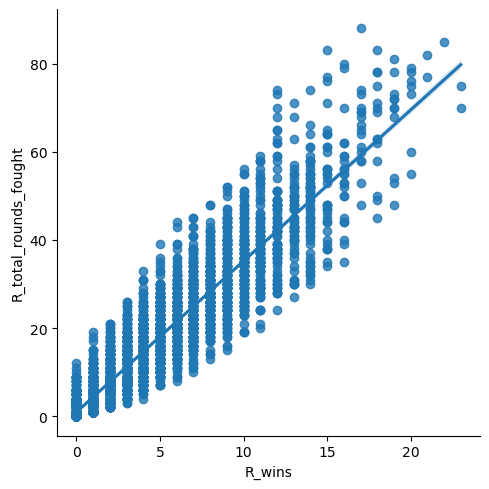

In [94]:
#Scatterplot of R_total_rounds_fought and R_wins
r_winscatter = sns.lmplot(y = 'R_total_rounds_fought', x = 'R_wins', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_win_rounds.png'), dpi = 300, bbox_inches='tight')

### Red wins against total rounds fought seem to trend similar to Blue wins. What is interesting with Red is that there are more points closer to the trend line in the upper righthand corner than Blue. There are more instances where Red corner had a high number of wins and high number of rounds fought.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


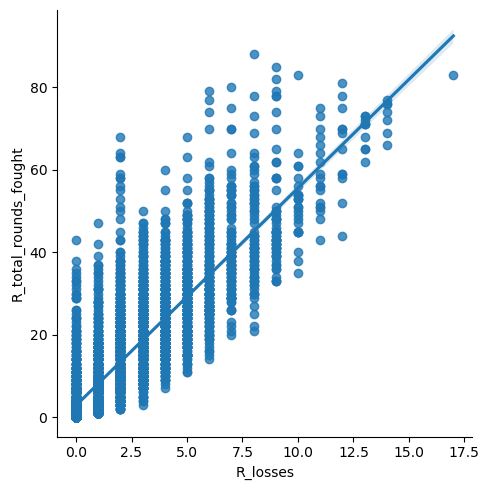

In [95]:
#Scatterplot of R_total_rounds_fought and R_losses
r_lossesscatter = sns.lmplot(y = 'R_total_rounds_fought', x = 'R_losses', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_losses_rounds.png'), dpi = 300, bbox_inches='tight')

### Red losses are similar to Blue losses, in that they have a vertical spread and upward trend. There is a peak in Red corner having 2 losses for 40-60 rounds. Blue corner also had 4 data points with over 80 rounds, whereas Red has about 2 data points over 80 rounds. The points on this chart seem closer together than on the Blue chart.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


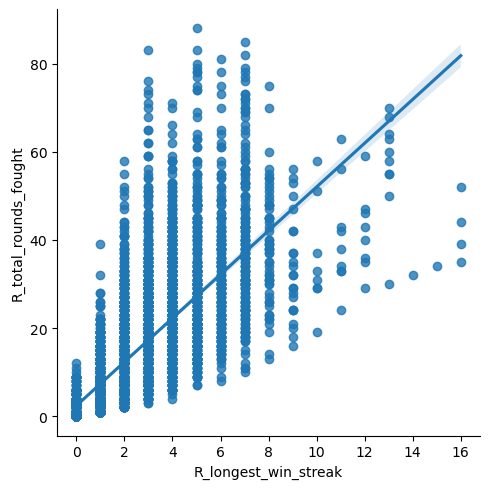

In [99]:
#Scatterplot of R_total_rounds_fought and R_longest_win_streak
r_streakscatter = sns.lmplot(y = 'R_total_rounds_fought', x = 'R_longest_win_streak', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_streak_rounds.png'), dpi = 300, bbox_inches='tight')

### The Blue graph seemed to only cluster near one corner, but this Red graph has more points outside of the cluster. There are more winning streaks in less number of rounds than in Blue corner. The Blue corner has 5 data points with 16 wins, while the Red corner has 4. The Red corner, however, has more data points in the 10-15 win streak area for about 20-60 rounds.

## Height, Reach, and Weight:

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


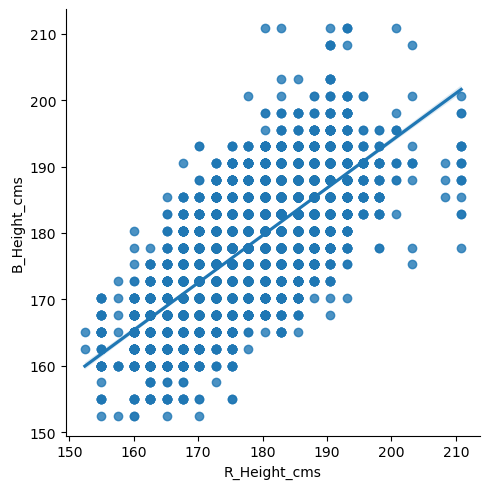

In [101]:
#Scatterplot of B_Height_cms and R_Height_cms
br_height = sns.lmplot(y = 'B_Height_cms', x = 'R_Height_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'br_height.png'), dpi = 300, bbox_inches='tight')

### Despite having a high correlation, the data points do not cluster near the trend line. I think this is because we are seeing the same data twice, when the same fighter is in Blue corner and later in Red corner. I will run a couple more scatterplots comparing the same metrics, and then cross-compare them.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


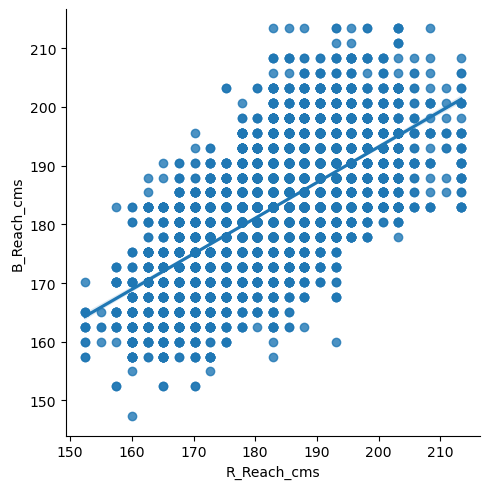

In [102]:
#Scatterplot of B_Reach_cms and R_Reach_cms
br_reach = sns.lmplot(y = 'B_Reach_cms', x = 'R_Reach_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'br_reach.png'), dpi = 300, bbox_inches='tight')

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


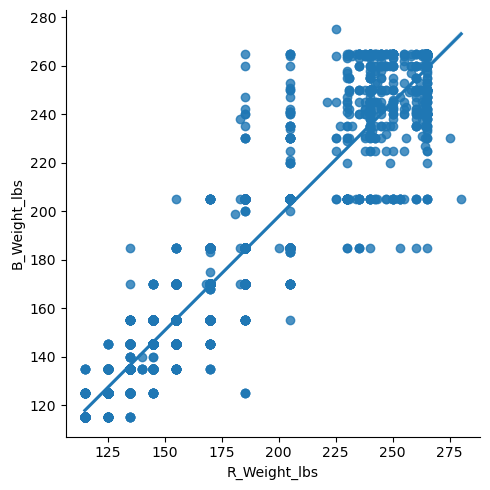

In [103]:
#Scatterplot of B_Weight_lbs and R_Weight_lbs
br_weight = sns.lmplot(y = 'B_Weight_lbs', x = 'R_Weight_lbs', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'br_weight.png'), dpi = 300, bbox_inches='tight')

## While the weight chart has an interesting distribution of points, all charts are symetrical across the trend line as well.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


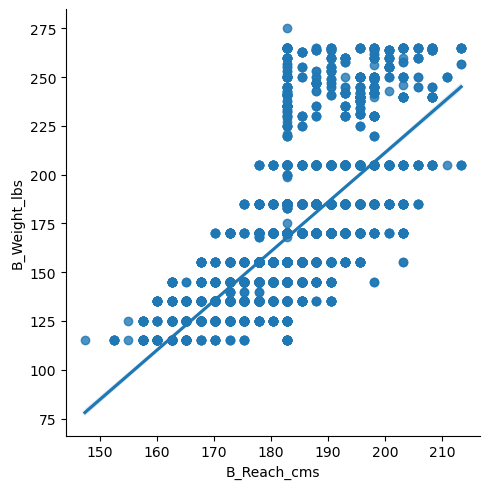

In [109]:
#Scatterplot of B_Weight_lbs and B_Reach_cms
b_weight_reach = sns.lmplot(y = 'B_Weight_lbs', x = 'B_Reach_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_weight_reach.png'), dpi = 300, bbox_inches='tight')

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


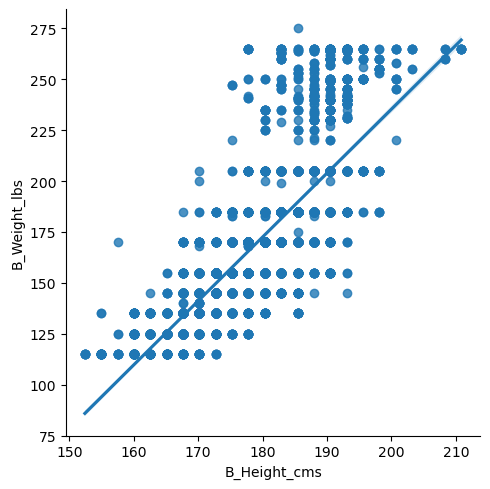

In [107]:
#Scatterplot of B_Weight_lbs and B_Height_cms
b_weight_height = sns.lmplot(y = 'B_Weight_lbs', x = 'B_Height_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_weight_height.png'), dpi = 300, bbox_inches='tight')

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


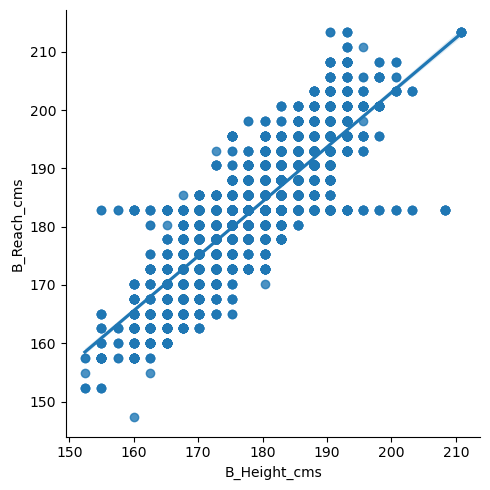

In [108]:
#Scatterplot of B_Reach_cms and B_Height_cms
b_reach_height = sns.lmplot(y = 'B_Reach_cms', x = 'B_Height_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_reach_height.png'), dpi = 300, bbox_inches='tight')

### When looking at Blue metrics, there only seemed to be a relationship with reach and height. This would make sense, as a taller person would have longer arms and more reach. I believe the horizontal line of points across all heights are the median that was used to fill in missing values. This may need to be readjusted to follow the general trend of large height equaling large reach, if it is throwing off the numbers.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


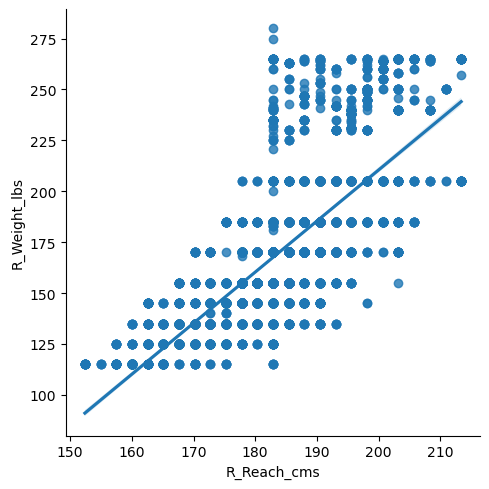

In [110]:
#Scatterplot of R_Weight_lbs and R_Reach_cms
r_weight_reach = sns.lmplot(y = 'R_Weight_lbs', x = 'R_Reach_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_weight_reach.png'), dpi = 300, bbox_inches='tight')

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


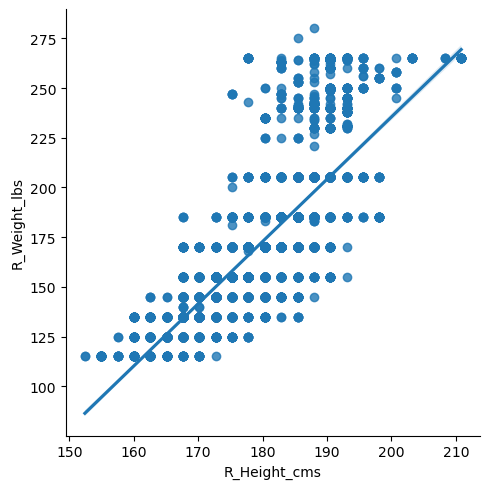

In [111]:
#Scatterplot of R_Weight_lbs and R_Height_cms
r_weight_height = sns.lmplot(y = 'R_Weight_lbs', x = 'R_Height_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_weight_height.png'), dpi = 300, bbox_inches='tight')

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


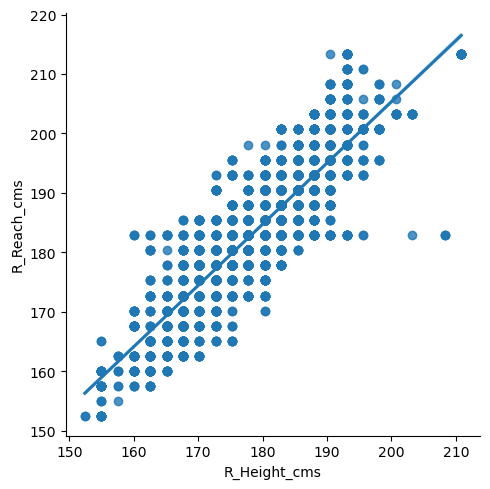

In [112]:
#Scatterplot of R_Reach_cms and R_Height_cms
r_reach_height = sns.lmplot(y = 'R_Reach_cms', x = 'R_Height_cms', data = df_ufc)
#Saving scatterplot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_reach_height.png'), dpi = 300, bbox_inches='tight')

### The Red charts of metrics also only seemed to have a relationship between height and reach. They also have the same horizontal line of points that was the median value used for missing data, but there was less missing data for Red records than Blue records.

## 06. Pair Plot

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

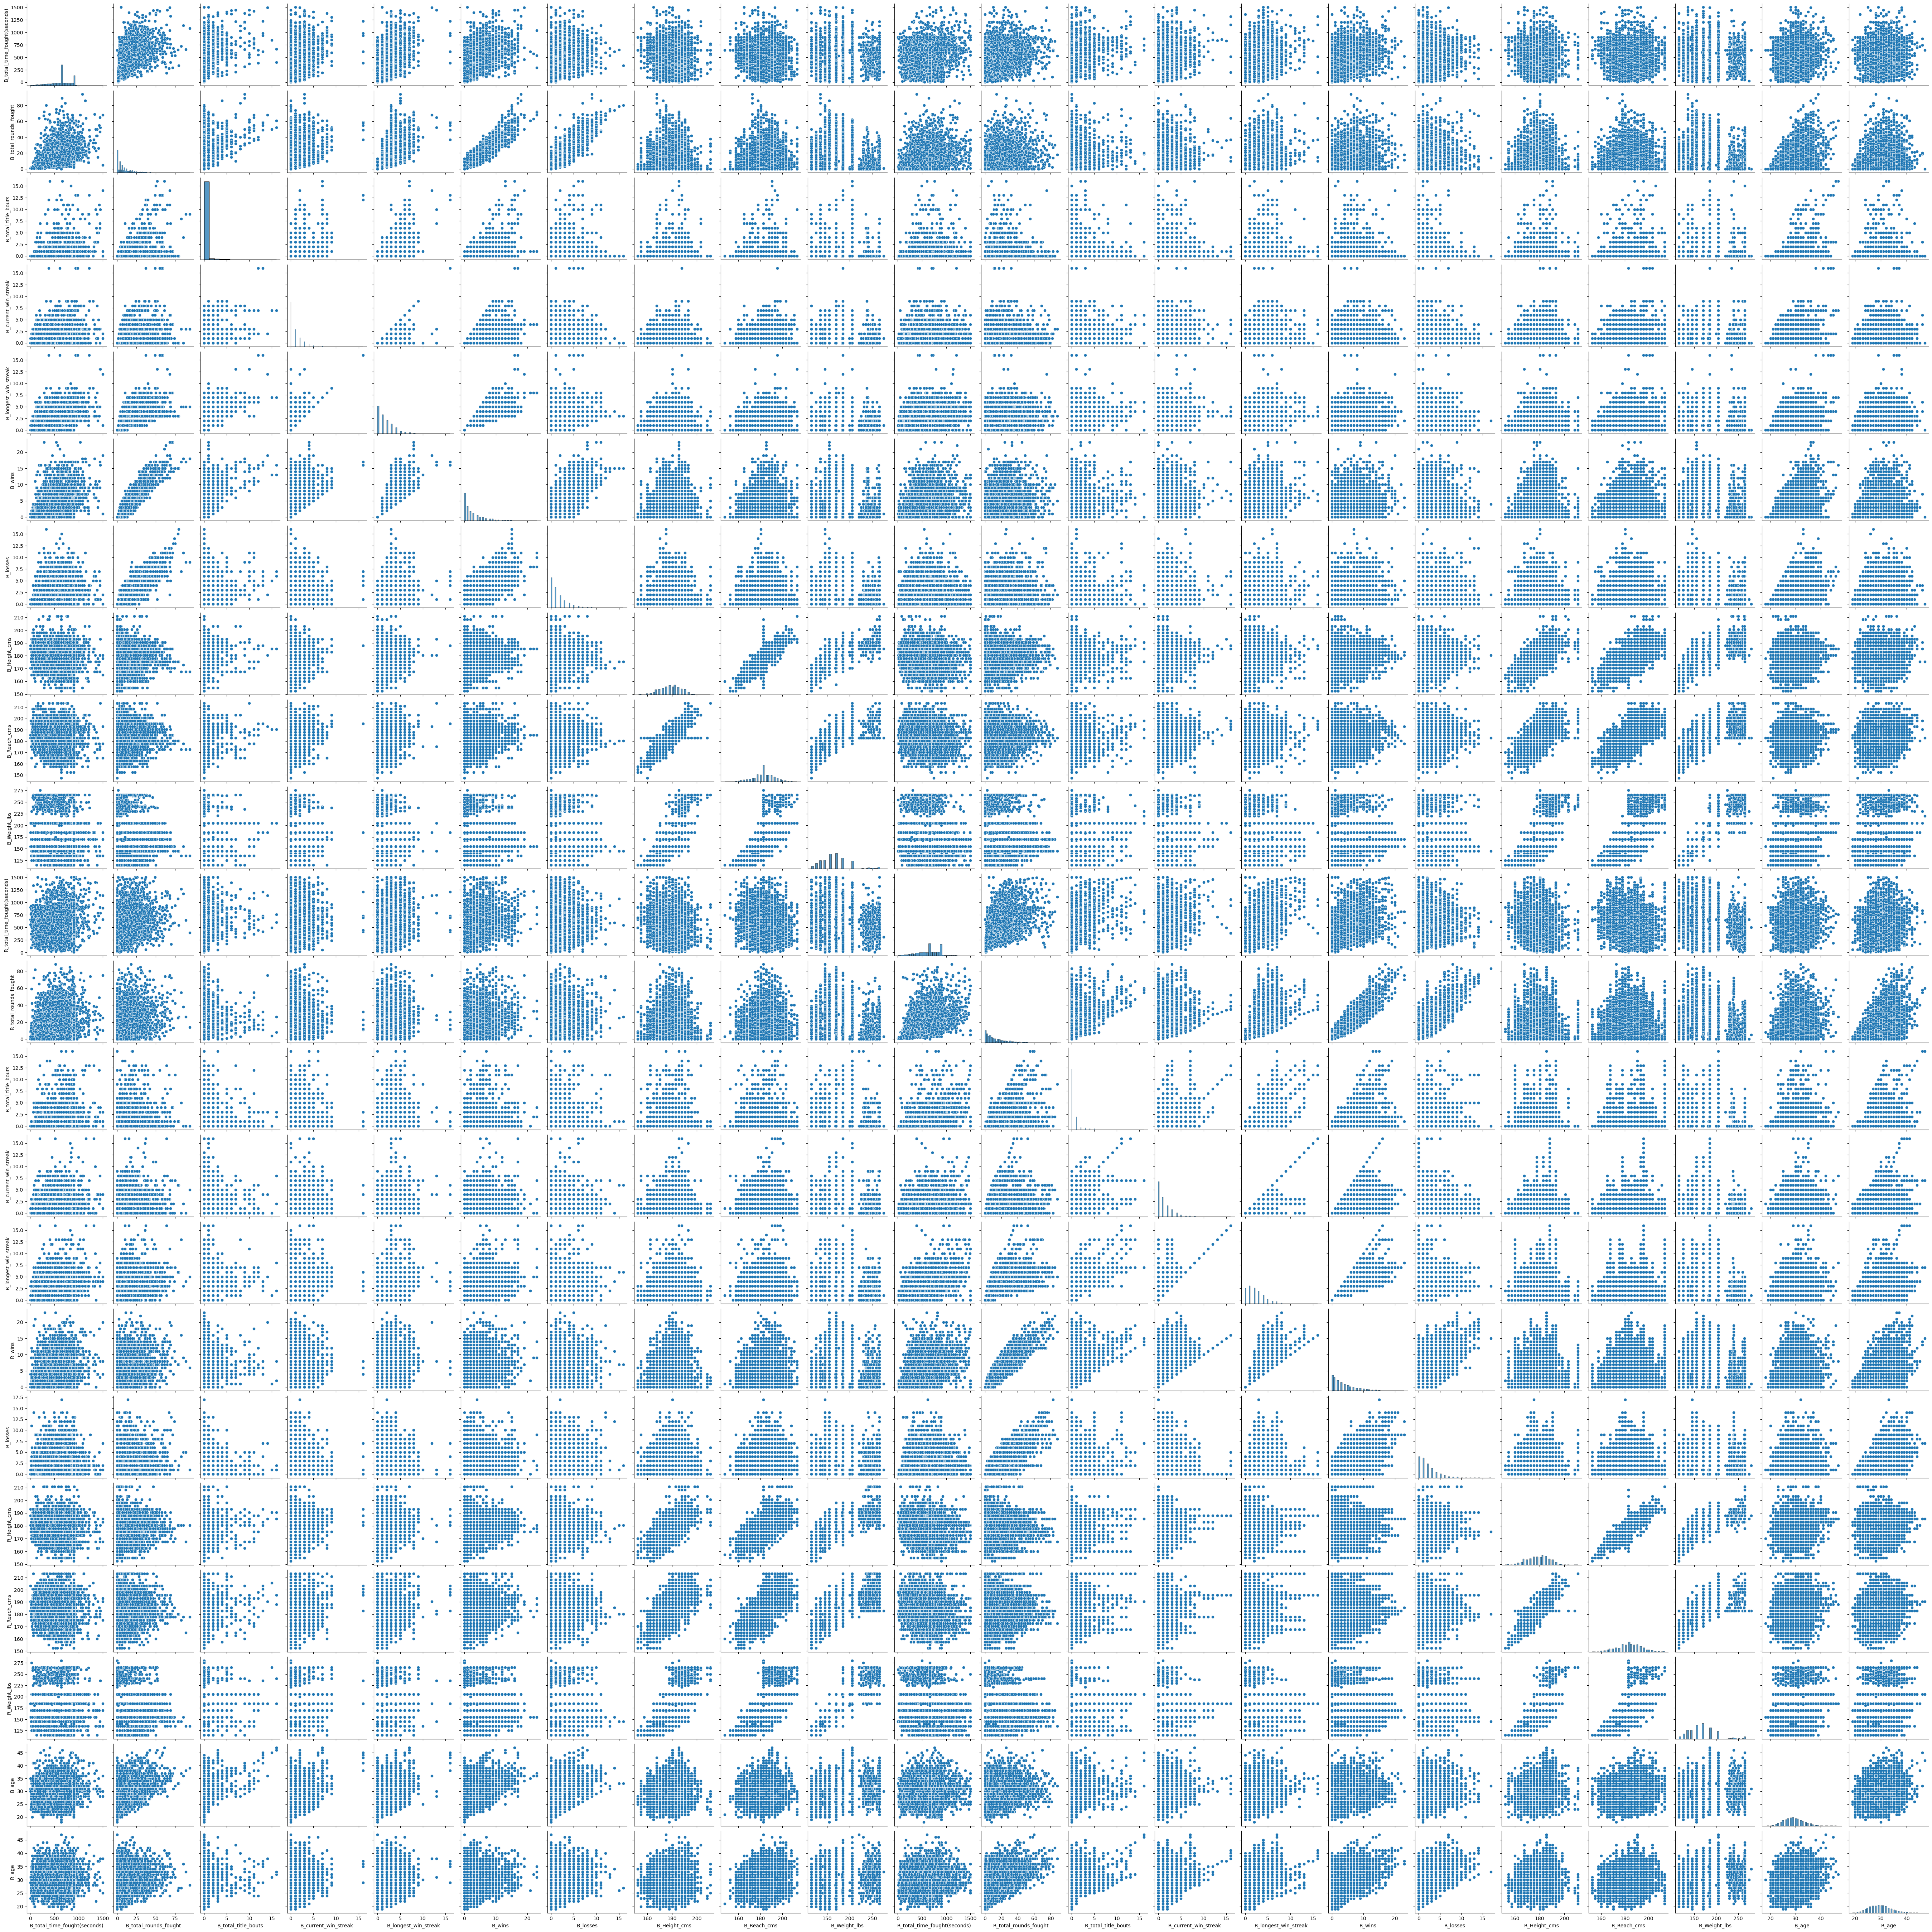

In [116]:
#Pair plot of columns in correlation matrix
pairplot = sns.pairplot(df_sub)
#Saving pair plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'pairplot.png'), dpi = 300, bbox_inches='tight')

### The pair plot is very large, and this one only includes the variables used for exploratory visual analysis. I will make smaller pair plots of variables I would like to explore further.

In [119]:
#Blue subset for pair plot
b_sub = df_ufc[['B_wins', 'B_losses', 'B_Stance', 'B_Height_cms', 'B_Weight_lbs', 'B_Reach_cms', 'B_age', 'weight_class']]

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

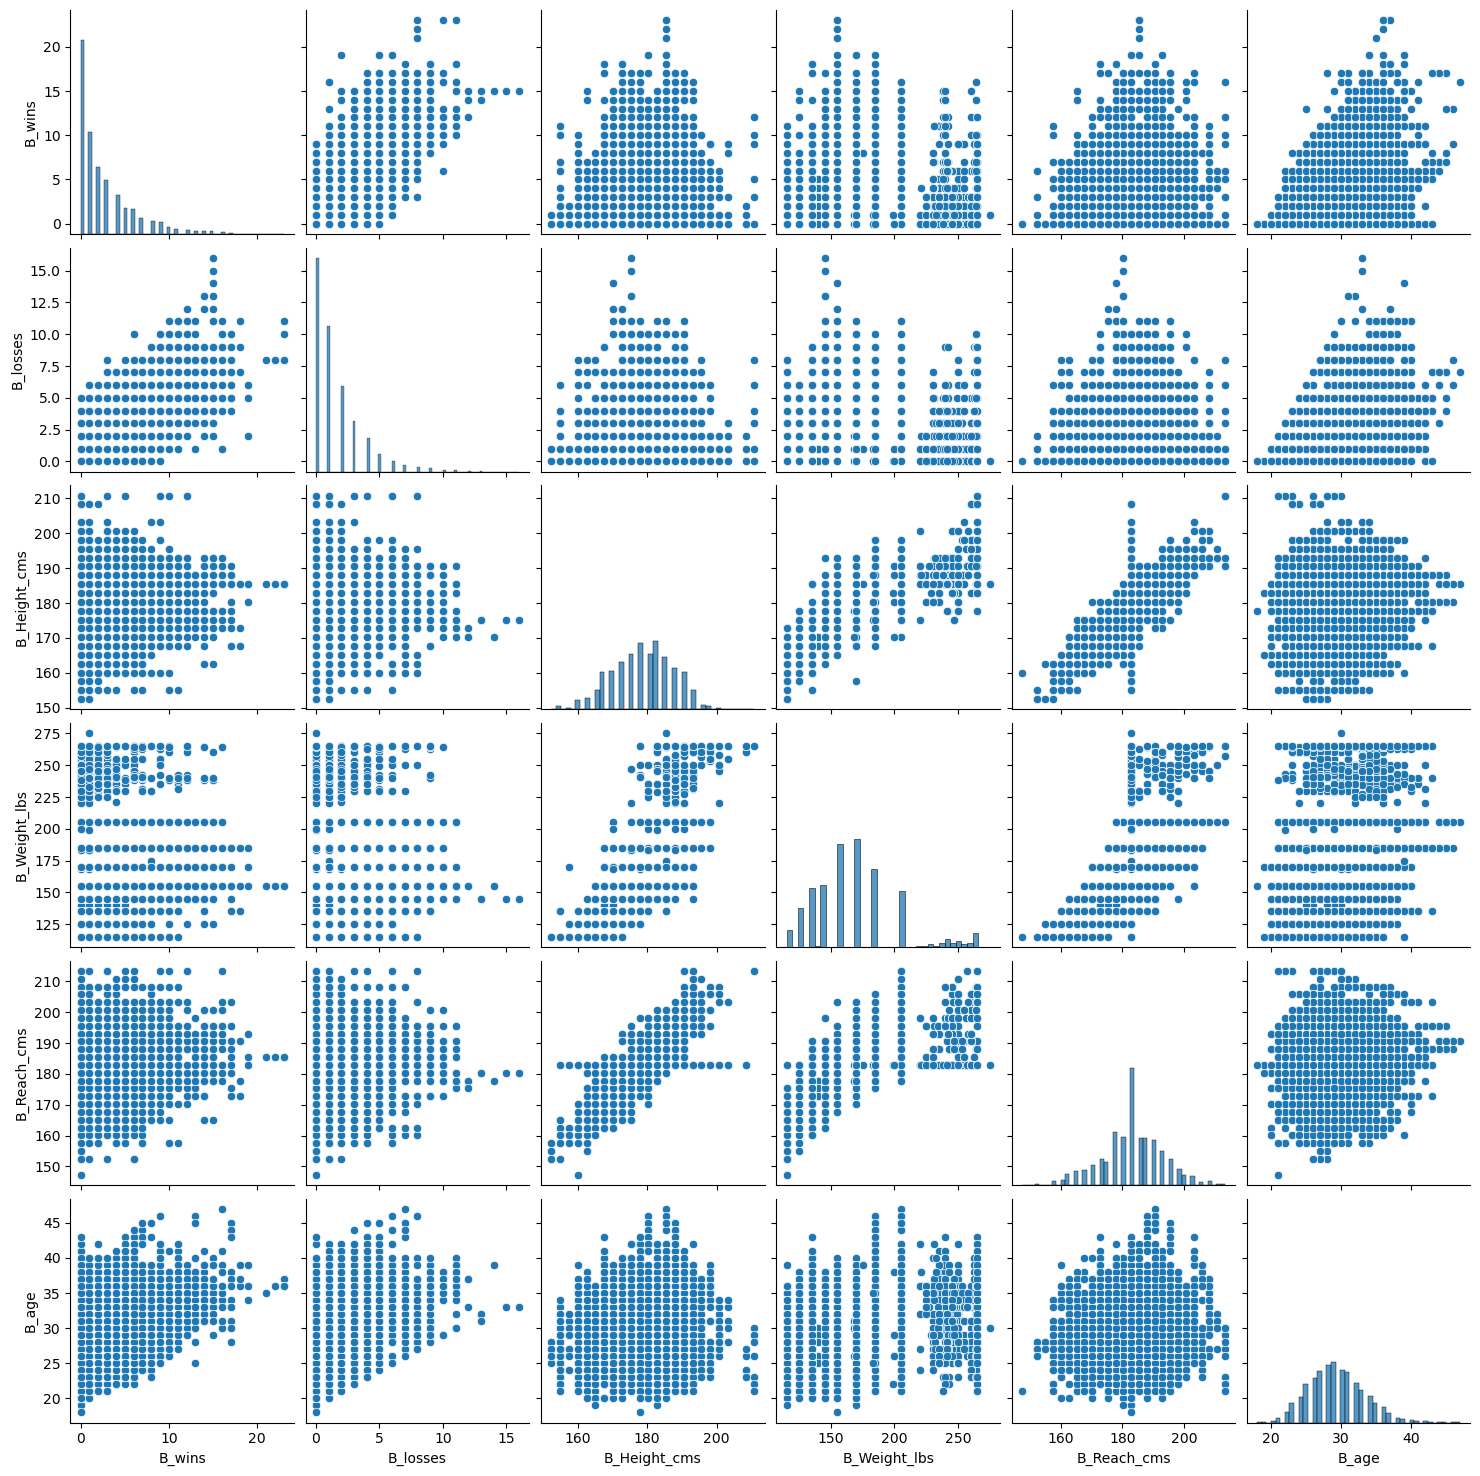

In [120]:
#Pair plot of Blue subset
b_pairplot = sns.pairplot(b_sub)
#Saving pair plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_pairplot.png'), dpi = 300, bbox_inches='tight')

In [121]:
#Red subset for pair plot
r_sub = df_ufc[['R_wins', 'R_losses', 'R_Stance', 'R_Height_cms', 'R_Weight_lbs', 'R_Reach_cms', 'R_age', 'weight_class']]

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

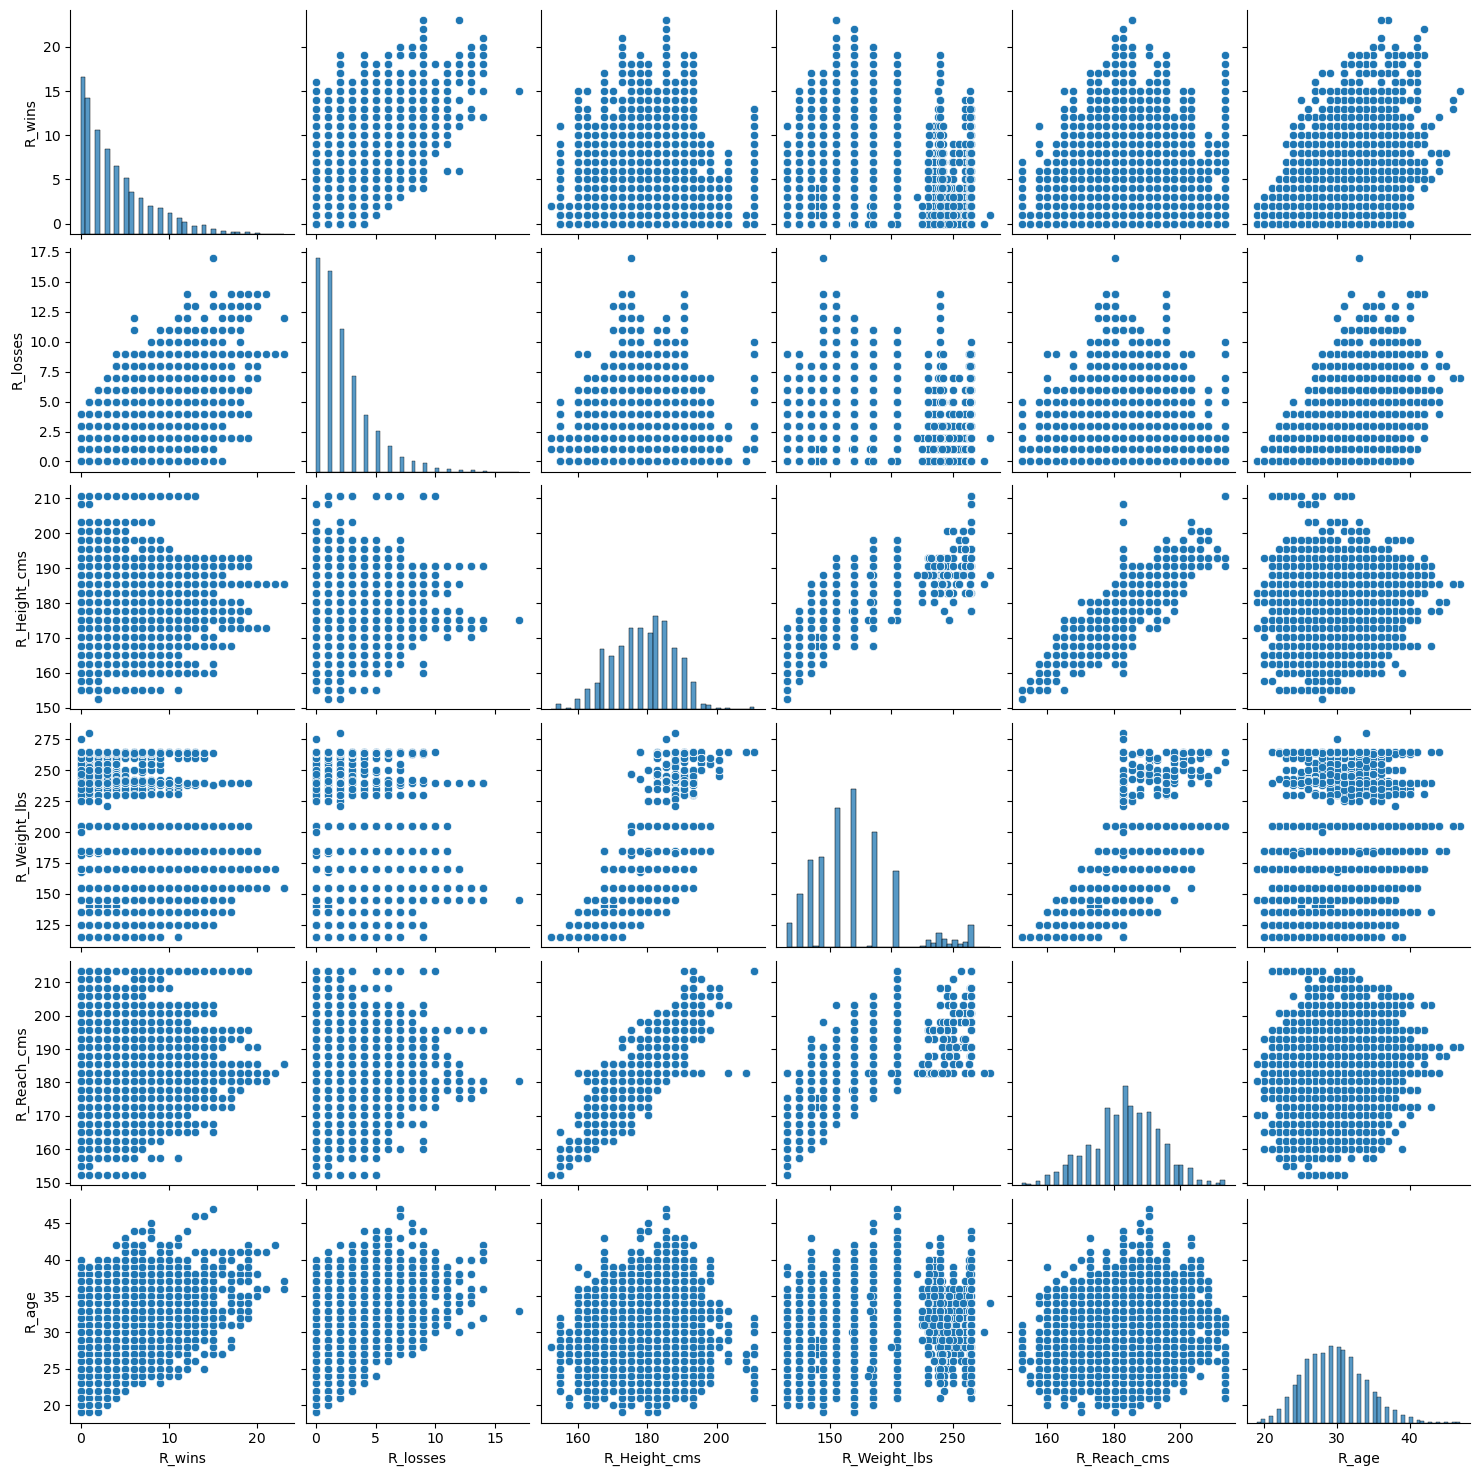

In [122]:
#Pair plot of Red subset
r_pairplot = sns.pairplot(r_sub)
#Saving pair plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_pairplot.png'), dpi = 300, bbox_inches='tight')

### Some of these scatterplots do support the correlation heat map. For example, age doesn't seem to have a relationship with the number of wins. The spread is very wide, but it does peak in the 30yrs-40yrs range. Reach and height also have the same wide spread with peaks in the middle. One of the questions I have is trying to find out what, if any factor, contributes to winning. It would be good to explore those relationships more.

## 07. Categorical Plot

### Creating an age category may be useful for further analysis.

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


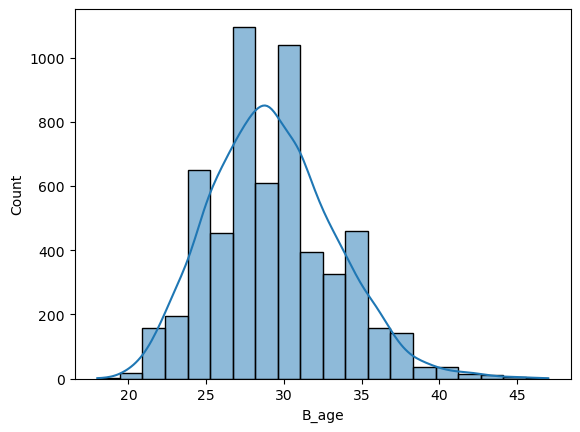

In [130]:
#Visualizing spread of variables in B_age for categories
sns.histplot(df_ufc['B_age'], bins = 20, kde = True)
#Saving spread
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'b_age_hist.png'), dpi = 300, bbox_inches='tight')

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


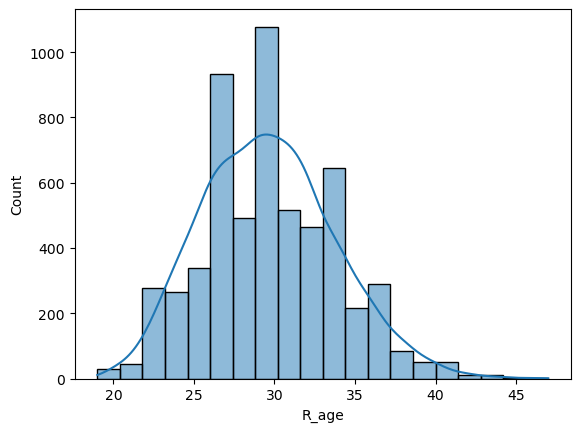

In [131]:
#Visualizing spread of variables in R_age for categories
sns.histplot(df_ufc['R_age'], bins = 20, kde = True)
#Saving spread
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_age_hist.png'), dpi = 300, bbox_inches='tight')

In [147]:
#Based on spread of ages I will create 3 age categories:
#Age 18-26 Blue = Younger
df_ufc.loc[(df_ufc['B_age'] < 27), 'Age_group'] = 'Younger'

In [148]:
#Age 27-33 Blue = Middle
df_ufc.loc[(df_ufc['B_age'] >= 27) & (df_ufc['B_age'] < 34), 'Age_group'] = 'Middle'

In [149]:
#Age 34-47 Blue = Older
df_ufc.loc[(df_ufc['B_age'] >= 34) & (df_ufc['R_age'] >= 34), 'Age_group'] = 'Older'

In [150]:
#Age 18-26 Red = Young
df_ufc.loc[(df_ufc['R_age'] < 27), 'Age_group'] = 'Younger'

In [151]:
#Age 27-33 Red = Middle
df_ufc.loc[(df_ufc['R_age'] >= 27) & (df_ufc['R_age'] < 34), 'Age_group'] = 'Middle'

In [152]:
#Age 34-47 Red = Older
df_ufc.loc[(df_ufc['R_age'] >= 34) & (df_ufc['R_age'] >= 34), 'Age_group'] = 'Older'

In [153]:
#Checking Age_group
df_ufc['Age_group'].value_counts(dropna = False)

Age_group
Middle     3380
Younger    1406
Older      1023
Name: count, dtype: int64

In [170]:
#Changing ages to integer to try and clarify chart
df_ufc['B_age'] = df_ufc['B_age'].astype(int)

In [171]:
df_ufc['R_age'] = df_ufc['R_age'].astype(int)

C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Mosspants\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


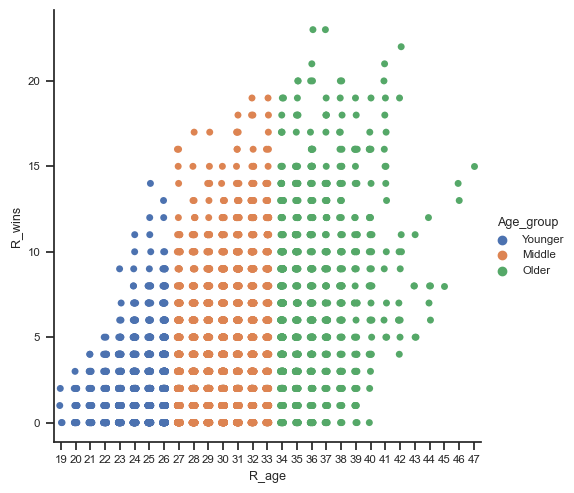

In [178]:
# Categorical plot in seaborn from Age_group R
sns.set(style = 'ticks', font_scale = 0.75)
r_age_cat = sns.catplot(x = 'R_age', y = 'R_wins', hue = 'Age_group', data = df_ufc)
#Saving categorical plot
plt.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'r_age_cat.png'), dpi = 300, bbox_inches='tight')

### Some of the dots looked doubled, and I think that is because the same fighter can be in B corner or R corner and have the same age. We can use either B_age or R_age to see the age spread. It looks like there are more people age 34-47 visually, but there is less doubling up of points and it is more spread out.
### Another thing that may be affecting the plot is the way the data is structured. Each match has age data, so if the same fighter is fighting in different years, their age will be recorded again. Instead of having one age for that fighter, we will have two or more depending on how many years they are fighting.

## 08. Revisiting Questions

### Questions that have been answered: 

### Q: What are the common characteristics of fighters that win more often compared to fighter that lose more often?
### A: There is no weight, height, reach, or age similarity among winners or losers. "Characteristics" that are common among those who win seem to be external, like number of rounds fought.

### Q: Are there a difference in age, weight, height, reach, weight class, location, and/or corner?
### A: While there are differences between these variables they don't seem to affect wins or losses. We still have to look into location though.

### New question:

### Q: What wins made up the winning streaks? We can see some were done in a shorter amount of rounds. Were there more knock-out wins, tap outs, etc.

## 09. Hypothesis

### Fighters that are in more rounds have more wins. If a fighter is in more rounds, then they have more matches and more experience.

### After doing more research on UFC, it doesn't seem like there's a set match system or tournament structure. Sometimes what determines a title match is the entertainment factor, and fighters get offered a title bout instead of it happening after an elimination-style tournament. Because of this I've decided to stop focusing so much on title matches and to look more towards overall wins and losses.

## 10. Exporting Data

In [183]:
#Exporting dataframe with new group and age datatype changes
df_ufc.to_csv(os.path.join(path, '02_Data', 'Prepared_Data', 'ufc_cleaned_eva.csv'))